# Diabetes Data Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
diabetes=load_diabetes()

In [8]:
df=pd.DataFrame(diabetes.data)

In [10]:
df.columns=diabetes.feature_names

In [12]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


# EDA

In [13]:
df['target']=diabetes.target

In [14]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
df.shape

(442, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [18]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [20]:
df.nunique()

age        58
sex         2
bmi       163
bp        100
s1        141
s2        302
s3         63
s4         66
s5        184
s6         56
target    214
dtype: int64

In [21]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [22]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

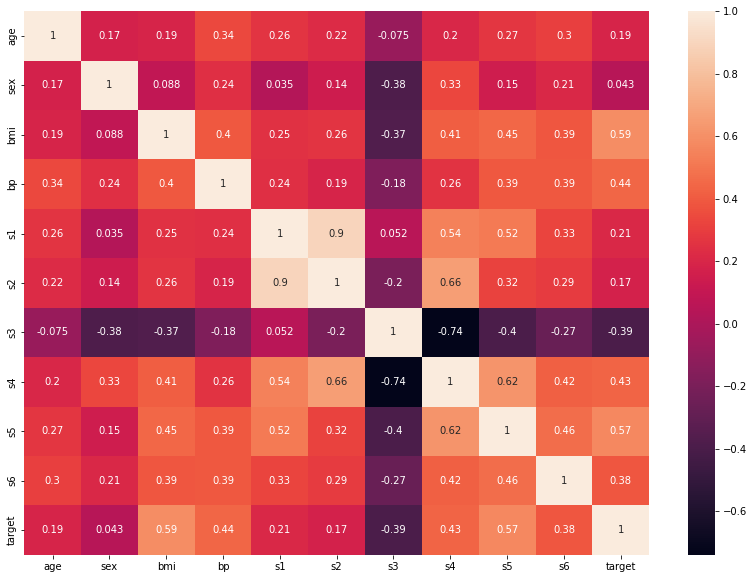

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

C:\Users\karan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


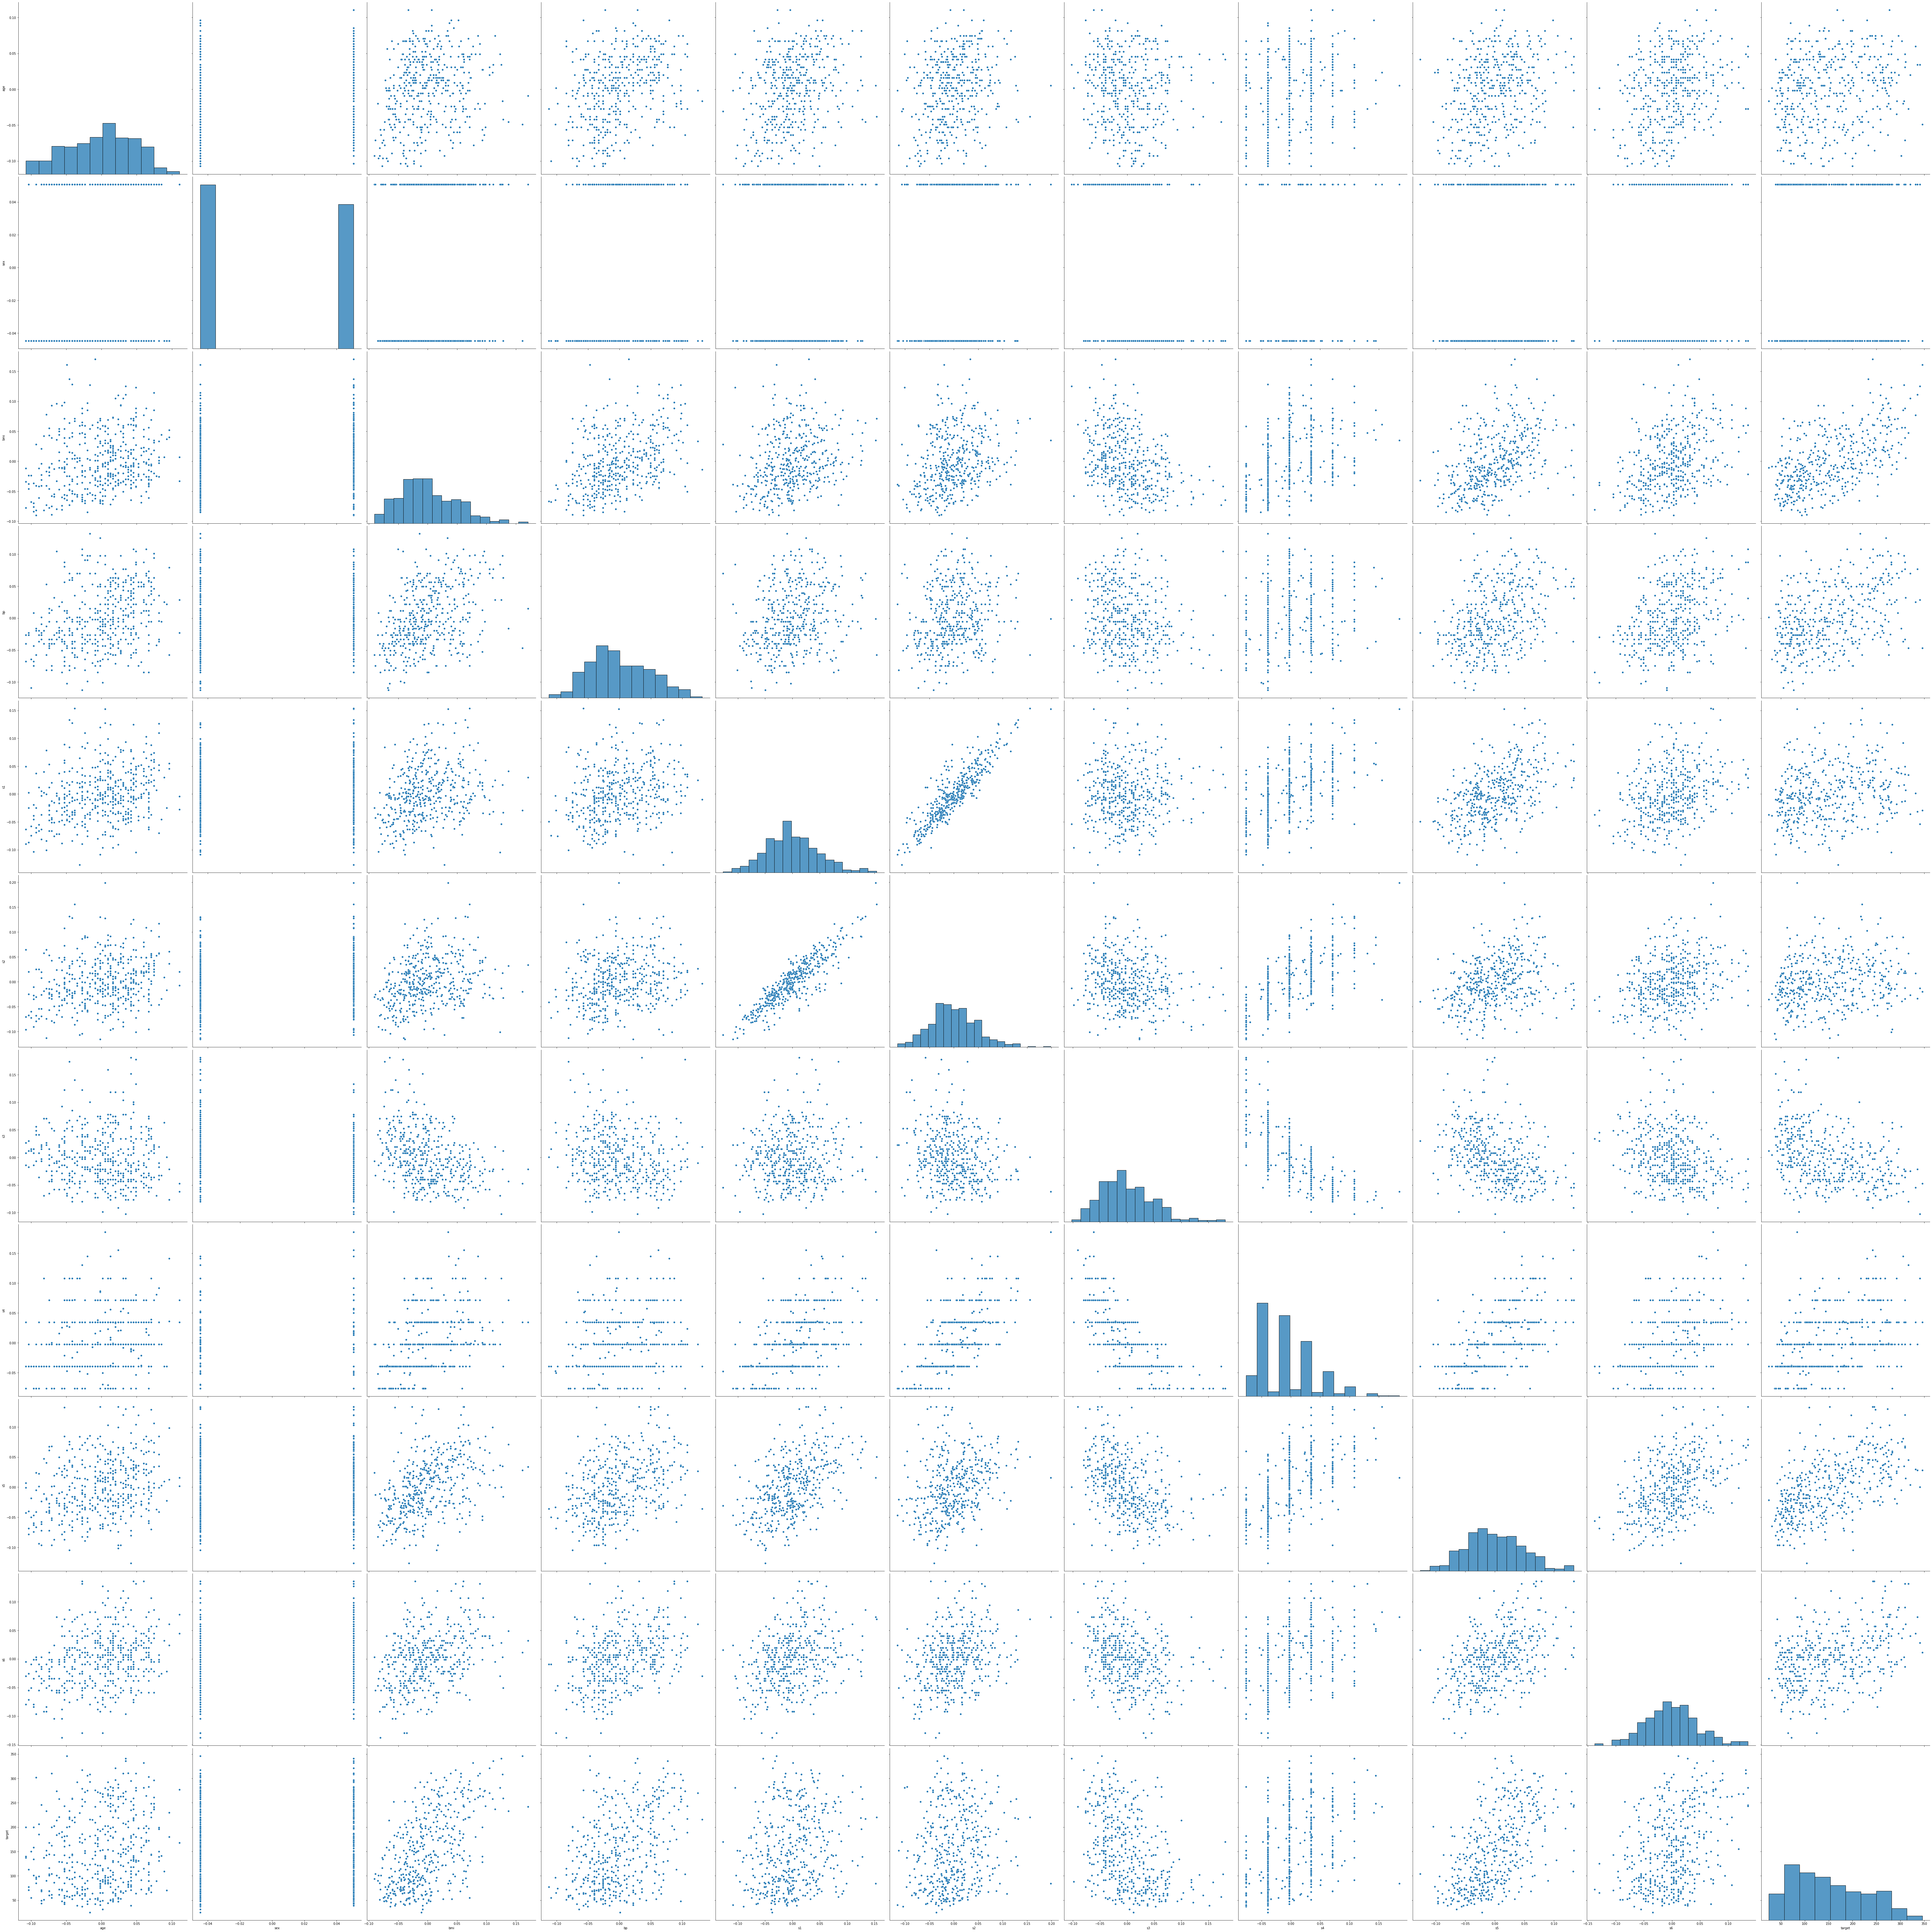

In [25]:
sns.pairplot(df,size=8)

<AxesSubplot:>

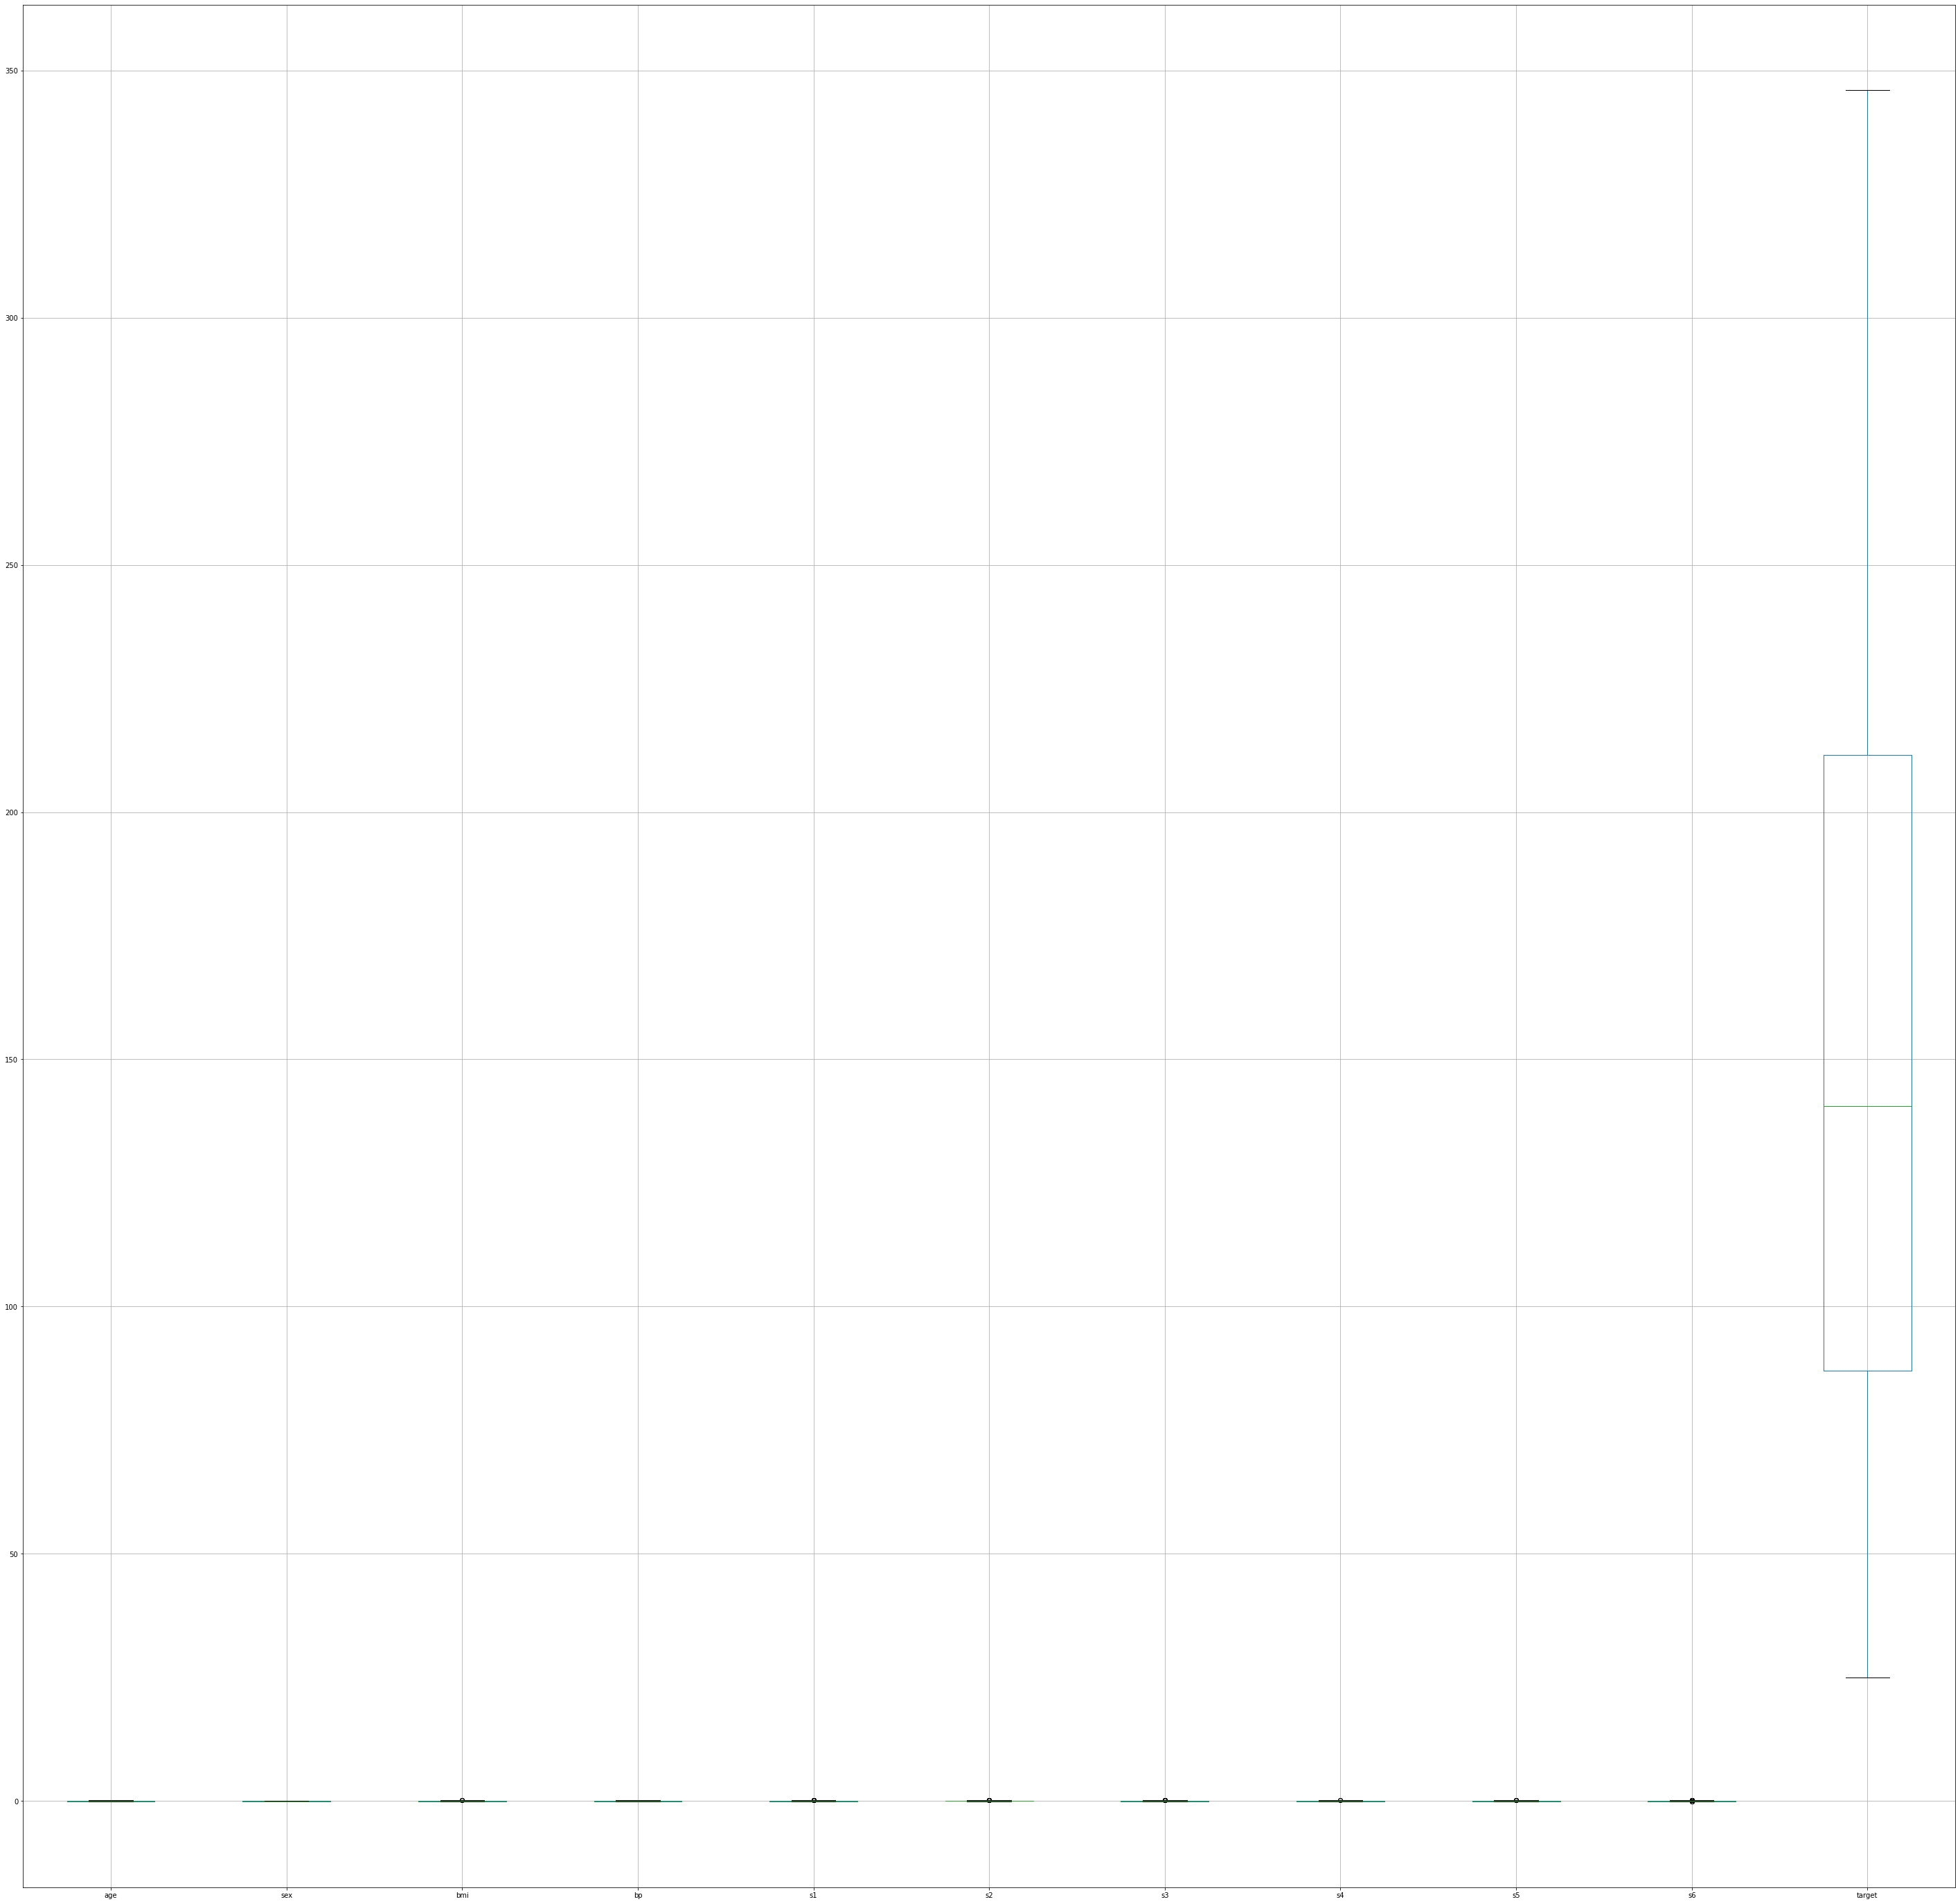

In [28]:
plt.figure(figsize=(50,50))
df.boxplot()

In [29]:
df.target.std()

77.09300453299109

In [30]:
df.to_csv('Diabetes Dataset.csv')

# ML - LR

In [31]:
x=np.array(df.drop('target',axis=1))
y=np.array(df.target)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [36]:
model=LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=model.predict(x_test)

In [39]:
y_test

array([200., 202.,  67.,  80., 151., 145.,  65., 308.,  42.,  92., 150.,
       202., 184., 101.,  47., 237.,  88., 152., 109.,  89., 163., 274.,
       138., 275.,  63., 154., 131.,  91., 128., 129., 243., 200.,  72.,
       185., 296., 144.,  75., 175., 281., 292., 292., 214., 275.,  92.,
        65.,  31.,  53.,  51., 258.,  40.,  69.,  86., 142., 128., 243.,
        55., 144., 230., 265.,  63., 217., 102.,  66., 101., 137., 261.,
       147.,  64., 252.,  59., 220., 126.,  43.,  48., 217., 164., 143.,
       206.,  72., 110., 244.,  51.,  52., 302., 276., 150., 124., 114.,
       179.])

In [40]:
y_pred

array([148.09458516, 208.21448655, 186.40135524,  82.48965216,
       163.39653073, 126.18143914, 126.17724958, 264.70331461,
        78.54858451,  73.56481553, 124.4689202 , 142.22687534,
       166.45460816,  98.50324681,  49.71926751, 223.51885186,
       143.44349424, 110.5012214 , 202.53750375,  78.50254776,
       191.80480185, 243.20329918,  75.88567591, 214.90592447,
        55.73373802, 158.02617798, 157.53992794, 158.88760345,
       166.22196789, 107.63395683, 276.82079667, 179.20223753,
        60.48622195, 157.42996282, 218.98051639, 182.29527384,
        70.84294506, 186.74063243, 285.13699146, 196.19271553,
       202.26323537, 145.38409277, 215.03147478, 124.55368149,
        80.17165114,  98.99489648,  82.02540073,  83.40454634,
       289.99417929, 134.33365281, 112.13359083, 152.32232951,
       109.90693735, 226.28507254, 245.73758587,  85.55979881,
       122.28190225, 139.20366172, 198.9567451 , 120.92328732,
       179.99403801, 106.43755487, 123.02826713,  96.45

In [45]:
model.score(x_test,y_test)

0.5341988244945842

In [42]:
r2_score(y_test,y_pred)

0.5341988244945842

In [46]:
mean_absolute_error(y_test,y_pred)

42.79610243417213

In [47]:
mean_squared_error(y_test,y_pred)

2911.8118861191774

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

53.961207233707974

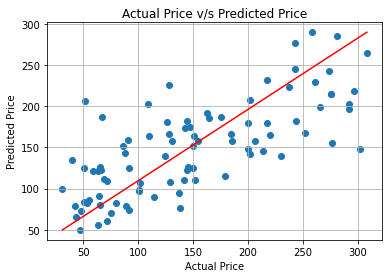

In [50]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price v/s Predicted Price")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')